# Analisis de Emociones en Español

In [1]:
### Grupo4: TryCatched

### Create Load Function

In [1]:
import os, sys
jiazz = os.path.abspath(os.path.join('..'))
print(jiazz)
if jiazz not in sys.path:
    sys.path.append(jiazz)
sys.path


/app


['',
 '/usr/local/lib/python36.zip',
 '/usr/local/lib/python3.6',
 '/usr/local/lib/python3.6/lib-dynload',
 '/usr/local/lib/python3.6/site-packages',
 '/usr/local/lib/python3.6/site-packages/IPython/extensions',
 '/root/.ipython',
 '/app']

In [2]:
from pandas import read_csv, DataFrame
from sklearn.utils import shuffle
from slugify import slugify


def load(filename):
    df = read_csv('/app/data/%s.csv' % filename)
    return shuffle(df)

In [3]:
df = load('social-emotions-spanish')
df.head()

sample    label
2846                        Jorge Javier eres repulsivo      mad
3337  Me tienen re podrido con Dios   los santos y l...      mad
4287           RT @BouixEliana: que clima asqueroso man      mad
3738  Perdón x llenarte de abrazos y besos cada vez ...      sad
7017  #juntėmonosporlaseleccion #ANcentral mi hija p...  neutral

## Tokenize Words

In [4]:
from core import Jiazz as J


df['sample'] = df['sample'].apply(lambda x: J.stemmer(x))
df.head()

sample    label
2846                                  jorg javi repuls      mad
3337                         podr dios sant conch madr      mad
4287                                   clim asquer man      mad
3738  perdn lenart abraz bes preocup demostrart import      sad
7017                                        hij peruan  neutral

### Split Training Dataset

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X, y = df['sample'], df['label']

vect = TfidfVectorizer()

classes = df.label.unique()
print(classes)

X_train, X_test, Y_train, Y_test = train_test_split(X, y,
                                                    test_size=.2,
                                                    random_state=45)

['mad' 'sad' 'neutral' 'glad' 'scared']


### Entrenamiento

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np


alg = LogisticRegression()

pipeline = Pipeline([('vec', vect), ("clf", alg)])
print('Run Logistic')

param_grid = dict(
    clf__C=[15],
    clf__fit_intercept=[True],
    clf__random_state=[777],
    clf__penalty=['l2'],
    vec__ngram_range=[(1, 2)],
    vec__analyzer=['word'],
    vec__max_df=[.85],
    vec__binary=[True],
    vec__norm=['l2']
)

grid_search = GridSearchCV(pipeline, param_grid=param_grid, verbose=2, cv=4)
grid_search.fit(X, y)

print(grid_search.best_params_)
print(grid_search.best_score_)

Run Logistic
Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV] clf__C=15, clf__fit_intercept=True, clf__penalty=l2, clf__random_state=777, vec__analyzer=word, vec__binary=True, vec__max_df=0.85, vec__ngram_range=(1, 2), vec__norm=l2 
[CV]  clf__C=15, clf__fit_intercept=True, clf__penalty=l2, clf__random_state=777, vec__analyzer=word, vec__binary=True, vec__max_df=0.85, vec__ngram_range=(1, 2), vec__norm=l2, total=   0.3s
[CV] clf__C=15, clf__fit_intercept=True, clf__penalty=l2, clf__random_state=777, vec__analyzer=word, vec__binary=True, vec__max_df=0.85, vec__ngram_range=(1, 2), vec__norm=l2 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  clf__C=15, clf__fit_intercept=True, clf__penalty=l2, clf__random_state=777, vec__analyzer=word, vec__binary=True, vec__max_df=0.85, vec__ngram_range=(1, 2), vec__norm=l2, total=   0.3s
[CV] clf__C=15, clf__fit_intercept=True, clf__penalty=l2, clf__random_state=777, vec__analyzer=word, vec__binary=True, vec__max_df=0.85, vec__ngram_range=(1, 2), vec__norm=l2 
[CV]  clf__C=15, clf__fit_intercept=True, clf__penalty=l2, clf__random_state=777, vec__analyzer=word, vec__binary=True, vec__max_df=0.85, vec__ngram_range=(1, 2), vec__norm=l2, total=   0.3s
[CV] clf__C=15, clf__fit_intercept=True, clf__penalty=l2, clf__random_state=777, vec__analyzer=word, vec__binary=True, vec__max_df=0.85, vec__ngram_range=(1, 2), vec__norm=l2 
[CV]  clf__C=15, clf__fit_intercept=True, clf__penalty=l2, clf__random_state=777, vec__analyzer=word, vec__binary=True, vec__max_df=0.85, vec__ngram_range=(1, 2), vec__norm=l2, total=   0.3s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.4s finished


{'clf__C': 15, 'clf__fit_intercept': True, 'clf__penalty': 'l2', 'clf__random_state': 777, 'vec__analyzer': 'word', 'vec__binary': True, 'vec__max_df': 0.85, 'vec__ngram_range': (1, 2), 'vec__norm': 'l2'}
0.770260747005


## Validacion

In [8]:
from sklearn.metrics import classification_report, accuracy_score


print("[Val set] Best %s: %.4f" % ('accuracy', grid_search.best_score_))
pred_test = grid_search.predict(X_test)

print(classification_report(Y_test, pred_test, target_names=classes))
accuracy = accuracy_score(Y_test, pred_test)

print("[Test set] Accuracy: %.4f" % accuracy)


[Val set] Best accuracy: 0.7703
             precision    recall  f1-score   support

        mad       1.00      1.00      1.00       469
        sad       1.00      1.00      1.00       442
    neutral       0.98      0.99      0.99       179
       glad       1.00      0.99      0.99       236
     scared       1.00      0.99      0.99        93

avg / total       1.00      1.00      1.00      1419

[Test set] Accuracy: 0.9965


## Generate Binary Model

In [9]:
from core import Jiazz as J


J.compress(grid_search, 'emotions_esp')

'emotions_esp'

### Test Binary Model

In [10]:
%matplotlib inline  

from core import Jiazz as J
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
    
plt.style.use('fivethirtyeight')
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Set figure width to 12 and height to 9
fig_size[0] = 10
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size


alg = J.load('emotions_esp')
def make_pie(scores):
    labels = [label for label, value in scores.get('scores').items()]
    sizes = [value for label, value in scores.get('scores').items()]

    explode = (0, 0, 0, 0, 0) 

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

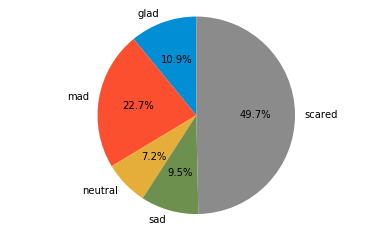

In [13]:
text = "casi me caigo de las escaleras, idiota!"
make_pie(J.score(alg, text))
